In [1]:
!pip install diffusers invisible_watermark transformers accelerate safetensors torch --upgrade --quiet

In [5]:
from diffusers import DiffusionPipeline
import torch

In [6]:
base = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, use_safetensors=True, variant="fp16")
base.to("cuda")

refiner = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-refiner-1.0",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
    vae=base.vae,
    text_encoder_2=base.text_encoder_2,
)
refiner.to("cuda")

base.unet = torch.compile(base.unet, mode="reduce-overhead", fullgraph=True)
refiner.unet = torch.compile(refiner.unet, mode="reduce-overhead", fullgraph=True)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Fetching 9 files:   0%|          | 0/9 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [7]:
prompt = "Astronaut in a jungle, cold color palette, muted colors, detailed, 8k"

In [8]:
image = base(prompt, num_inference_steps=30, output_type="latent").images[0]
image = refiner(prompt, num_inference_steps=30, image=image).images[0]

  0%|          | 0/30 [00:00<?, ?it/s]

/usr/bin/ld: skipping incompatible /usr/lib/libcuda.so when searching for -lcuda
/usr/bin/ld: skipping incompatible /usr/lib/libcuda.so when searching for -lcuda
/usr/bin/ld: skipping incompatible /usr/lib/libcuda.so when searching for -lcuda
/usr/bin/ld: skipping incompatible /usr/lib/libcuda.so when searching for -lcuda
/usr/bin/ld: skipping incompatible /usr/lib/libcuda.so when searching for -lcuda
/usr/bin/ld: skipping incompatible /usr/lib/libcuda.so when searching for -lcuda
/usr/bin/ld: skipping incompatible /usr/lib/libcuda.so when searching for -lcuda
/usr/bin/ld: skipping incompatible /usr/lib/libcuda.so when searching for -lcuda
/usr/bin/ld: skipping incompatible /usr/lib/libcuda.so when searching for -lcuda
/usr/bin/ld: skipping incompatible /usr/lib/libcuda.so when searching for -lcuda
/usr/bin/ld: skipping incompatible /usr/lib/libcuda.so when searching for -lcuda
/usr/bin/ld: skipping incompatible /usr/lib/libcuda.so when searching for -lcuda
/usr/bin/ld: skipping incomp

  0%|          | 0/9 [00:00<?, ?it/s]

/usr/bin/ld: skipping incompatible /usr/lib/libcuda.so when searching for -lcuda
/usr/bin/ld: skipping incompatible /usr/lib/libcuda.so when searching for -lcuda
/usr/bin/ld: skipping incompatible /usr/lib/libcuda.so when searching for -lcuda
/usr/bin/ld: skipping incompatible /usr/lib/libcuda.so when searching for -lcuda


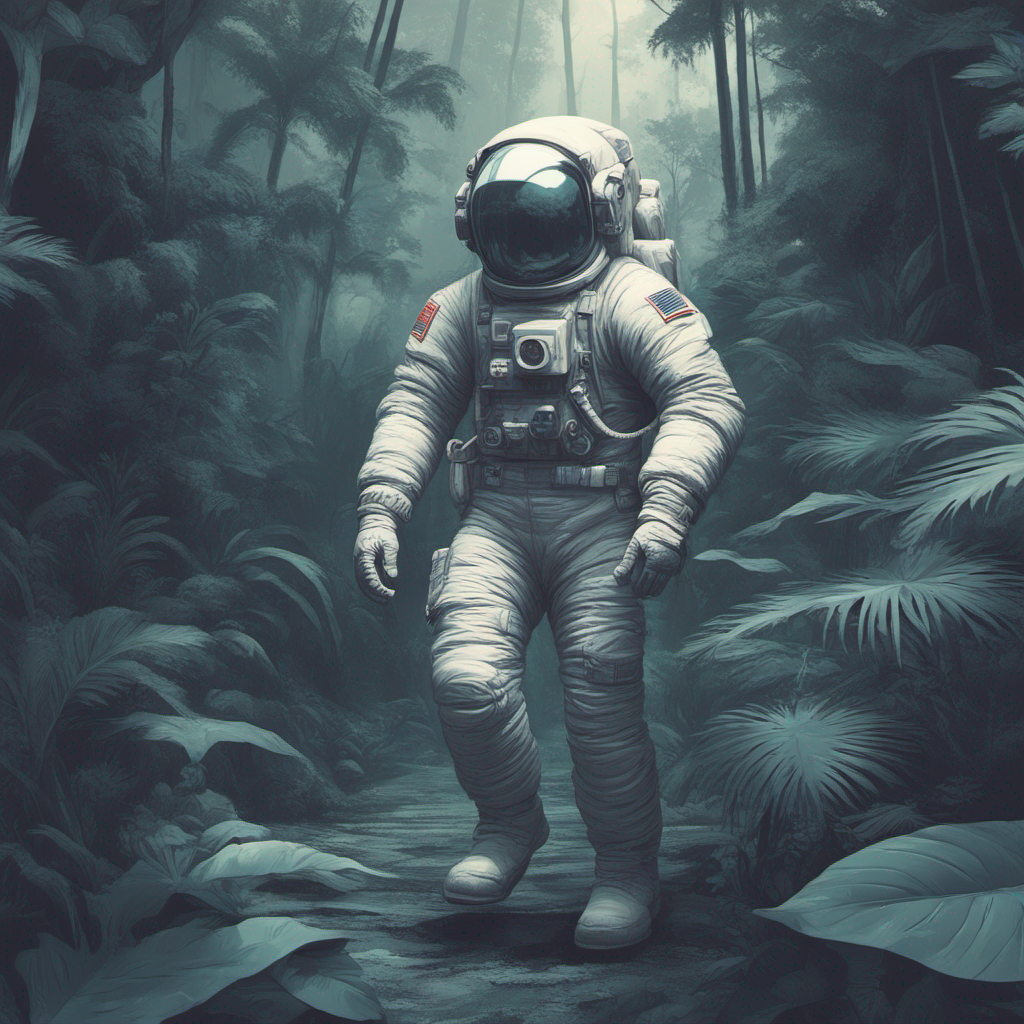

In [11]:
image